In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\mushrooms.csv")

### EDA

In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.nunique().sort_values()

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

Above a sorted list of categorical variable in every column. And if we look in **Veil-type** it has only one variable in it. May be it is kind of a class whom all type of Mushroom belong. It is also a unwanted column because it doesn't affect if all the type is same in predicting label but i still going to keep it.

<AxesSubplot:xlabel='class', ylabel='count'>

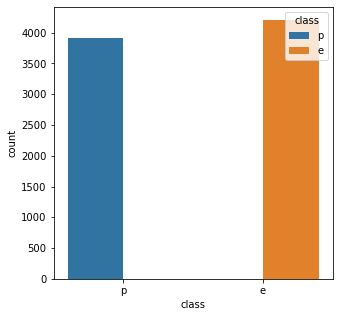

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(df["class"],hue="class",data=df)

### Dataset is almost Balanced (Label)

<function matplotlib.pyplot.show(close=None, block=None)>

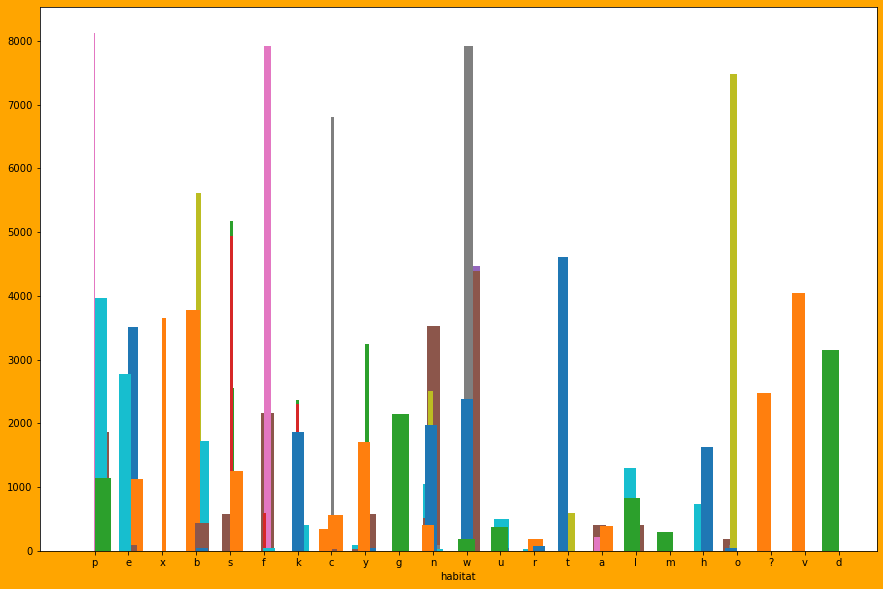

In [8]:
plt.figure(figsize=(15,10),facecolor='orange')
plotnumber = 1
for column in df:
    if plotnumber < 24:
        plt.hist(df[column],bins=45)
        plt.xlabel(column)
        plotnumber=+1
plt.show

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
for i in df:
    df_new = lab_en.fit_transform(df[i])
    pd.Series(df_new)
    df[i]=df_new

In [10]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

checking Skewness in the data but not removing any skewness because the whole dataset is **categorical**

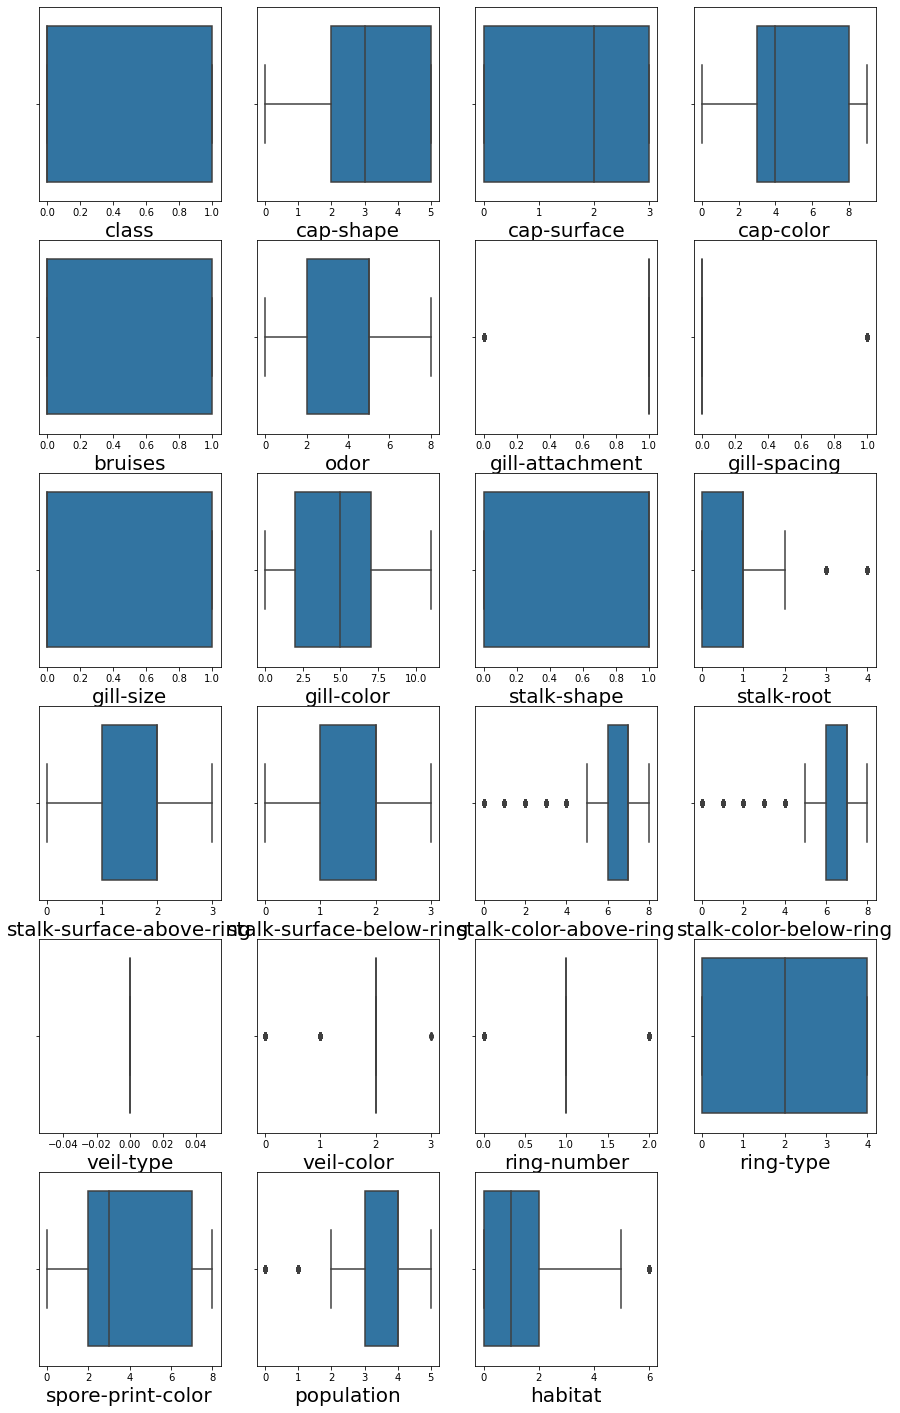

In [11]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 24:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize = 20)
    plotnumber+=1
plt.show()

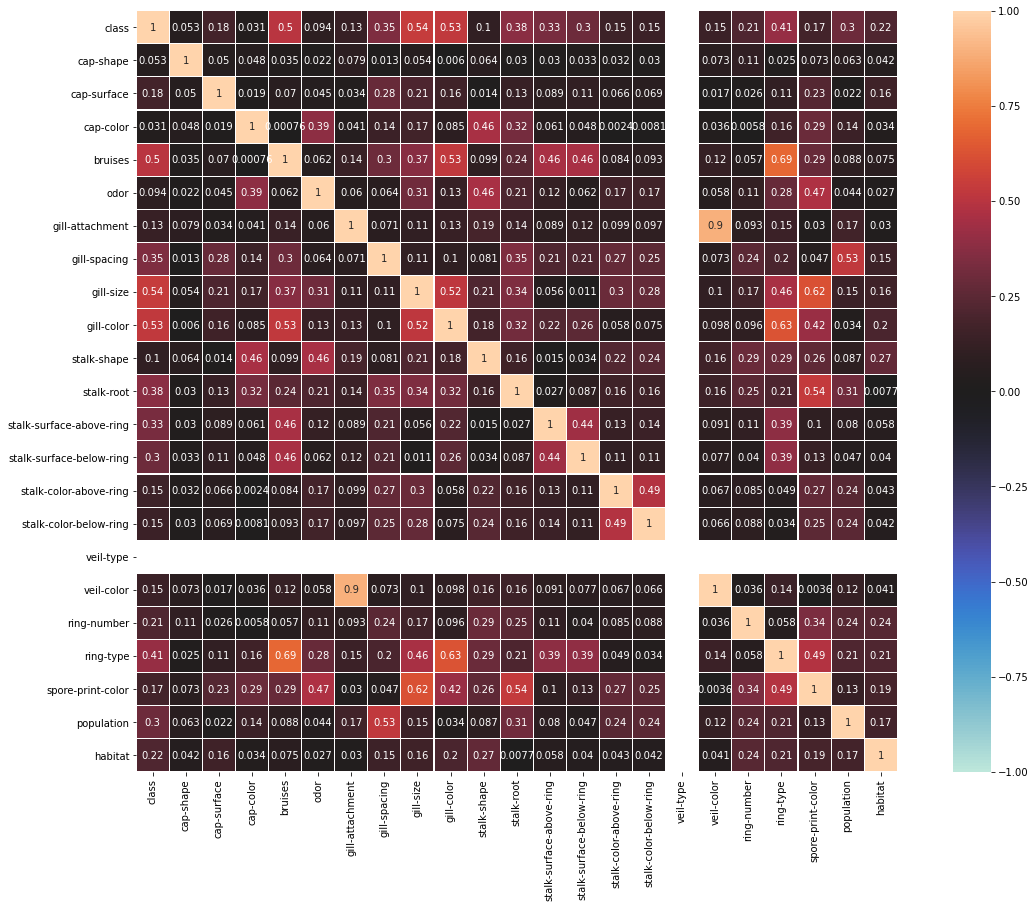

In [12]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,14))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)
plt.show()

In [13]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [14]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

<AxesSubplot:ylabel='None'>

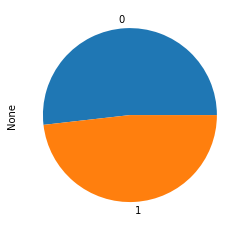

In [15]:
df.groupby(['class']).size().plot.pie(figsize=(4,4))

In [16]:
x = df.drop("class",axis=1)
y = df['class']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_scaled = scaler.fit_transform(x)

In [19]:
df['class'].unique()

array([1, 0])

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
max_accu = 0
max_RS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.9675963904840033


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=0)

## Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(x_test)

In [25]:
Name = ["Logistic Regression","SVC","Decision Tree","KNeighbors Classifier","Bagging Classifier"]
Accuracy_score = []
Cross_validation_score =[]
diff = []

In [26]:
result = accuracy_score(y_test,y_pred)
Accuracy_score.append(result)
print("Accuracy_score :\n",accuracy_score(y_test,y_pred))

Accuracy_score :
 0.9495488105004102


In [27]:
cv = cross_val_score(lr,x_scaled,y,cv=5).mean()
Cross_validation_score.append(cv)
print("Cross validation Score :",cross_val_score(lr,x_scaled,y,cv=5).mean())

Cross validation Score : 0.8301065555134521


In [28]:
diff.append(result-cv)

## SVC

In [29]:
sc = SVC()
sc.fit(x_train,y_train)

SVC()

In [30]:
y_pred=sc.predict(x_test)

In [31]:
result = accuracy_score(y_test,y_pred)
Accuracy_score.append(result)
print("Accuracy_score :\n",accuracy_score(y_test,y_pred))

Accuracy_score :
 1.0


In [32]:
cv = cross_val_score(sc,x_scaled,y,cv=5).mean()
Cross_validation_score.append(cv)
print("Cross validation score :",cross_val_score(sc,x_scaled,y,cv=5).mean())

Cross validation score : 0.8702213717317167


In [33]:
diff.append(result-cv)


## Decison Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pre=dt.predict(x_test)

In [38]:
result = accuracy_score(y_test,y_pred)
Accuracy_score.append(result)
print("Accuracy_score :\n",accuracy_score(y_test,y_pred))

Accuracy_score :
 1.0


In [39]:
cv = cross_val_score(dt,x_scaled,y,cv=5).mean()
Cross_validation_score.append(cv)
print("Cross validation score :",cv)

Cross validation score : 0.9123346722243275


In [40]:
diff.append(result-cv)


## Knn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn.predict(x_test)

In [44]:
result = accuracy_score(y_test,y_pred)
Accuracy_score.append(result)
print("Accuracy_score :\n",accuracy_score(y_test,y_pred))

Accuracy_score :
 1.0


In [45]:
cv = cross_val_score(knn,x_scaled,y,cv=5).mean()
Cross_validation_score.append(cv)
print("Cross validation score :",cv)

Cross validation score : 0.8797053429329292


In [46]:
diff.append(result-cv)


## Bagging Classifier

In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
bag_knn = BaggingClassifier()

In [49]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

1.0

In [50]:
y_pre= bag_knn.predict(x_test)

In [51]:
result = accuracy_score(y_test,y_pred)
Accuracy_score.append(result)
print("Accuracy_score :\n",accuracy_score(y_test,y_pred))

Accuracy_score :
 1.0


In [52]:
cv = cross_val_score(bag_knn,x_scaled,y,cv=5).mean()
Cross_validation_score.append(cv)
print("Cross validation score :",cross_val_score(bag_knn,x_scaled,y,cv=5).mean())

Cross validation score : 0.9175075407351269


In [53]:
diff.append(result-cv)  

In [54]:
import pandas as pd
Best_model = pd.DataFrame({"Model":Name,
                          "Accuracy Score":Accuracy_score,
                          "Cross_validation_score":Cross_validation_score,
                          "Difference":diff})
Best_model

,Model,Accuracy Score,Cross_validation_score,Difference
0,Logistic Regression,0.949549,0.830107,0.119442
1,SVC,1.000000,0.870221,0.129779
2,Decision Tree,1.000000,0.912335,0.087665
3,KNeighbors Classifier,1.000000,0.879705,0.120295
4,Bagging Classifier,1.000000,0.911473,0.088527


### Hyperparameter Tuning the Best model

In [55]:
param = {
    "criterion":["gini","entropy"],
    "max_depth" : range(1,100),
    "min_samples_split" : range(2,100,2),
    "min_samples_leaf" :range(1,100),
    "random_state":range(0,100),
    "max_leaf_nodes":range(0,100)
    
        }

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_search = GridSearchCV(estimator=dt,param_grid = param,cv=3,n_jobs=-1)

In [58]:
grid_params= {
    'criterion':['gini','entropy'],
    'max_depth':range(1,50,2),
    'min_samples_leaf':range(1,50,2),
    'min_samples_split':range(1,50,2),
}

In [59]:
grid_search = GridSearchCV(estimator = dt,
                          param_grid = grid_params,
                          cv=5,
                          n_jobs=-1)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50, 2),
                         'min_samples_leaf': range(1, 100, 2),
                         'min_samples_split': range(1, 100, 2)})

In [61]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [62]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth= 9, min_samples_leaf= 1,min_samples_split= 3)

In [63]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [64]:
y_pred= dt.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred)

1.0

In [66]:
cross_val_score(dt,x_scaled,y,cv=5).mean()

0.9202115953012505

In [70]:
## saving the model

import pickle
file = "Mushroom model.pk1"
pickle.dump(dt,open(file,'wb'))